In [1]:
# 設定中文字體顯示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Taipei Sans TC Beta', 'PingFang TC']
plt.rcParams['axes.unicode_minus'] = False # 避免負號顯示錯誤

# 資料儲存四種方式實作：CSV, JSON, SQLite3, MongoDB
## CRUD 操作實作 - 學生資料管理

In [2]:
# 導入必要的套件
import csv
import json
import sqlite3
import pandas as pd
from pymongo import MongoClient
import os

## 初始學生資料

In [3]:
# 定義初始學生資料
students_data = [
    {"學號": "S001", "姓名": "張小明", "住址": "台北市信義區", "電話": "02-12345678"},
    {"學號": "S002", "姓名": "李美麗", "住址": "新北市板橋區", "電話": "02-23456789"},
    {"學號": "S003", "姓名": "王大同", "住址": "台中市西屯區", "電話": "04-34567890"},
    {"學號": "S004", "姓名": "陳小玉", "住址": "高雄市左營區", "電話": "07-45678901"}
]

print("初始學生資料：")
for student in students_data:
    print(student)

初始學生資料：
{'學號': 'S001', '姓名': '張小明', '住址': '台北市信義區', '電話': '02-12345678'}
{'學號': 'S002', '姓名': '李美麗', '住址': '新北市板橋區', '電話': '02-23456789'}
{'學號': 'S003', '姓名': '王大同', '住址': '台中市西屯區', '電話': '04-34567890'}
{'學號': 'S004', '姓名': '陳小玉', '住址': '高雄市左營區', '電話': '07-45678901'}


# 1. CSV 檔案儲存方式

In [4]:
# CSV 檔案操作 - 簡單的文字格式，適合表格資料
csv_filename = "students.csv"

# Create - 建立CSV檔案並寫入資料
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['學號', '姓名', '住址', '電話']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for student in students_data:
        writer.writerow(student)

print(f"✅ CSV檔案 {csv_filename} 建立完成！")

# Read - 讀取CSV檔案
print("\n📖 從CSV讀取的資料：")
df_csv = pd.read_csv(csv_filename)
print(df_csv)

# Update - 更新資料（新增一筆）
new_student = {"學號": "S005", "姓名": "林小華", "住址": "台南市東區", "電話": "06-56789012"}
with open(csv_filename, 'a', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writerow(new_student)

print(f"\n✅ 已新增學生 {new_student['姓名']} 到CSV檔案")

# 重新讀取顯示更新後的資料
df_csv_updated = pd.read_csv(csv_filename)
print("\n📖 更新後的CSV資料：")
print(df_csv_updated)

✅ CSV檔案 students.csv 建立完成！

📖 從CSV讀取的資料：
     學號   姓名      住址           電話
0  S001  張小明  台北市信義區  02-12345678
1  S002  李美麗  新北市板橋區  02-23456789
2  S003  王大同  台中市西屯區  04-34567890
3  S004  陳小玉  高雄市左營區  07-45678901

✅ 已新增學生 林小華 到CSV檔案

📖 更新後的CSV資料：
     學號   姓名      住址           電話
0  S001  張小明  台北市信義區  02-12345678
1  S002  李美麗  新北市板橋區  02-23456789
2  S003  王大同  台中市西屯區  04-34567890
3  S004  陳小玉  高雄市左營區  07-45678901
4  S005  林小華   台南市東區  06-56789012


# 2. JSON 檔案儲存方式

In [5]:
# JSON 檔案操作 - 結構化資料格式，適合複雜資料結構
json_filename = "students.json"

# Create - 建立JSON檔案
with open(json_filename, 'w', encoding='utf-8') as jsonfile:
    json.dump(students_data, jsonfile, ensure_ascii=False, indent=2)

print(f"✅ JSON檔案 {json_filename} 建立完成！")

# Read - 讀取JSON檔案
print("\n📖 從JSON讀取的資料：")
with open(json_filename, 'r', encoding='utf-8') as jsonfile:
    json_data = json.load(jsonfile)
    for student in json_data:
        print(student)

# Update - 更新資料
json_data.append(new_student)
with open(json_filename, 'w', encoding='utf-8') as jsonfile:
    json.dump(json_data, jsonfile, ensure_ascii=False, indent=2)

print(f"\n✅ 已新增學生 {new_student['姓名']} 到JSON檔案")

# Delete - 刪除資料（刪除最後一筆）
if len(json_data) > 0:
    deleted_student = json_data.pop()
    with open(json_filename, 'w', encoding='utf-8') as jsonfile:
        json.dump(json_data, jsonfile, ensure_ascii=False, indent=2)
    print(f"\n❌ 已刪除學生 {deleted_student['姓名']} 從JSON檔案")

print("\n📖 最終JSON資料：")
with open(json_filename, 'r', encoding='utf-8') as jsonfile:
    final_json_data = json.load(jsonfile)
    for student in final_json_data:
        print(student)

✅ JSON檔案 students.json 建立完成！

📖 從JSON讀取的資料：
{'學號': 'S001', '姓名': '張小明', '住址': '台北市信義區', '電話': '02-12345678'}
{'學號': 'S002', '姓名': '李美麗', '住址': '新北市板橋區', '電話': '02-23456789'}
{'學號': 'S003', '姓名': '王大同', '住址': '台中市西屯區', '電話': '04-34567890'}
{'學號': 'S004', '姓名': '陳小玉', '住址': '高雄市左營區', '電話': '07-45678901'}

✅ 已新增學生 林小華 到JSON檔案

❌ 已刪除學生 林小華 從JSON檔案

📖 最終JSON資料：
{'學號': 'S001', '姓名': '張小明', '住址': '台北市信義區', '電話': '02-12345678'}
{'學號': 'S002', '姓名': '李美麗', '住址': '新北市板橋區', '電話': '02-23456789'}
{'學號': 'S003', '姓名': '王大同', '住址': '台中市西屯區', '電話': '04-34567890'}
{'學號': 'S004', '姓名': '陳小玉', '住址': '高雄市左營區', '電話': '07-45678901'}


# 3. SQLite3 資料庫儲存方式

In [6]:
# SQLite3 資料庫操作 - 輕量級關聯式資料庫
db_filename = "students.db"

# 連接資料庫
conn = sqlite3.connect(db_filename)
cursor = conn.cursor()

# Create - 建立資料表
cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        學號 TEXT PRIMARY KEY,
        姓名 TEXT NOT NULL,
        住址 TEXT,
        電話 TEXT
    )
''')

# Insert - 插入初始資料
for student in students_data:
    cursor.execute('''
        INSERT OR REPLACE INTO students (學號, 姓名, 住址, 電話)
        VALUES (?, ?, ?, ?)
    ''', (student['學號'], student['姓名'], student['住址'], student['電話']))

conn.commit()
print(f"✅ SQLite3資料庫 {db_filename} 建立完成！")

# Read - 查詢資料
print("\n📖 從SQLite3讀取的資料：")
cursor.execute("SELECT * FROM students")
rows = cursor.fetchall()
for row in rows:
    print(f"學號: {row[0]}, 姓名: {row[1]}, 住址: {row[2]}, 電話: {row[3]}")

# Update - 更新資料
cursor.execute('''
    UPDATE students SET 電話 = ? WHERE 學號 = ?
''', ("02-88888888", "S001"))
conn.commit()
print("\n✅ 已更新學生 S001 的電話")

# Delete - 刪除資料
cursor.execute('''
    DELETE FROM students WHERE 學號 = ?
''', ("S004",))
conn.commit()
print("✅ 已刪除學生 S004")

# 最終查詢
print("\n📖 最終SQLite3資料：")
cursor.execute("SELECT * FROM students")
final_rows = cursor.fetchall()
for row in final_rows:
    print(f"學號: {row[0]}, 姓名: {row[1]}, 住址: {row[2]}, 電話: {row[3]}")

# 關閉連接
conn.close()

✅ SQLite3資料庫 students.db 建立完成！

📖 從SQLite3讀取的資料：
學號: S001, 姓名: 張小明, 住址: 台北市信義區, 電話: 02-12345678
學號: S002, 姓名: 李美麗, 住址: 新北市板橋區, 電話: 02-23456789
學號: S003, 姓名: 王大同, 住址: 台中市西屯區, 電話: 04-34567890
學號: S004, 姓名: 陳小玉, 住址: 高雄市左營區, 電話: 07-45678901

✅ 已更新學生 S001 的電話
✅ 已刪除學生 S004

📖 最終SQLite3資料：
學號: S001, 姓名: 張小明, 住址: 台北市信義區, 電話: 02-88888888
學號: S002, 姓名: 李美麗, 住址: 新北市板橋區, 電話: 02-23456789
學號: S003, 姓名: 王大同, 住址: 台中市西屯區, 電話: 04-34567890


# 4. MongoDB 資料庫儲存方式（額外加分題）

In [7]:
# MongoDB 資料庫操作 - NoSQL文件資料庫
try:
    # 連接MongoDB
    client = MongoClient('localhost', 27017)
    
    # 檢查連接是否成功
    client.admin.command('ismaster')
    
    # 選擇資料庫和集合
    db = client['school_db']
    collection = db['students']
    
    # 清空現有資料（為了演示）
    collection.delete_many({})
    
    # Create - 插入資料
    result = collection.insert_many(students_data)
    print(f"✅ MongoDB 資料插入成功！插入 {len(result.inserted_ids)} 筆資料")
    
    # Read - 查詢所有資料
    print("\n📖 從MongoDB讀取的資料：")
    all_students = collection.find()
    for student in all_students:
        print(student)
    
    # Update - 更新資料
    collection.update_one(
        {"學號": "S002"},
        {"$set": {"住址": "新北市新店區", "電話": "02-99999999"}}
    )
    print("\n✅ 已更新學生 S002 的資料")
    
    # 查詢特定資料
    print("\n🔍 查詢學號 S002 的資料：")
    student_s002 = collection.find_one({"學號": "S002"})
    print(student_s002)
    
    # Delete - 刪除資料
    delete_result = collection.delete_one({"學號": "S003"})
    print(f"\n✅ 已刪除 {delete_result.deleted_count} 筆學生資料")
    
    # 最終查詢
    print("\n📖 最終MongoDB資料：")
    final_students = collection.find()
    for student in final_students:
        print(student)
    
    # 關閉連接
    client.close()
    
except Exception as e:
    print(f"❌ MongoDB 連接失敗: {e}")
    print("請確認 MongoDB 服務正在運行在 port 27017")
    print("安裝指令參考: brew install mongodb-community 或參考官方文件")

✅ MongoDB 資料插入成功！插入 4 筆資料

📖 從MongoDB讀取的資料：
{'_id': ObjectId('6903ca31f859bcc1faa3ab16'), '學號': 'S001', '姓名': '張小明', '住址': '台北市信義區', '電話': '02-12345678'}
{'_id': ObjectId('6903ca31f859bcc1faa3ab17'), '學號': 'S002', '姓名': '李美麗', '住址': '新北市板橋區', '電話': '02-23456789'}
{'_id': ObjectId('6903ca31f859bcc1faa3ab18'), '學號': 'S003', '姓名': '王大同', '住址': '台中市西屯區', '電話': '04-34567890'}
{'_id': ObjectId('6903ca31f859bcc1faa3ab19'), '學號': 'S004', '姓名': '陳小玉', '住址': '高雄市左營區', '電話': '07-45678901'}

✅ 已更新學生 S002 的資料

🔍 查詢學號 S002 的資料：
{'_id': ObjectId('6903ca31f859bcc1faa3ab17'), '學號': 'S002', '姓名': '李美麗', '住址': '新北市新店區', '電話': '02-99999999'}

✅ 已刪除 1 筆學生資料

📖 最終MongoDB資料：
{'_id': ObjectId('6903ca31f859bcc1faa3ab16'), '學號': 'S001', '姓名': '張小明', '住址': '台北市信義區', '電話': '02-12345678'}
{'_id': ObjectId('6903ca31f859bcc1faa3ab17'), '學號': 'S002', '姓名': '李美麗', '住址': '新北市新店區', '電話': '02-99999999'}
{'_id': ObjectId('6903ca31f859bcc1faa3ab19'), '學號': 'S004', '姓名': '陳小玉', '住址': '高雄市左營區', '電話': '07-45678901'}


# 資料視覺化比較

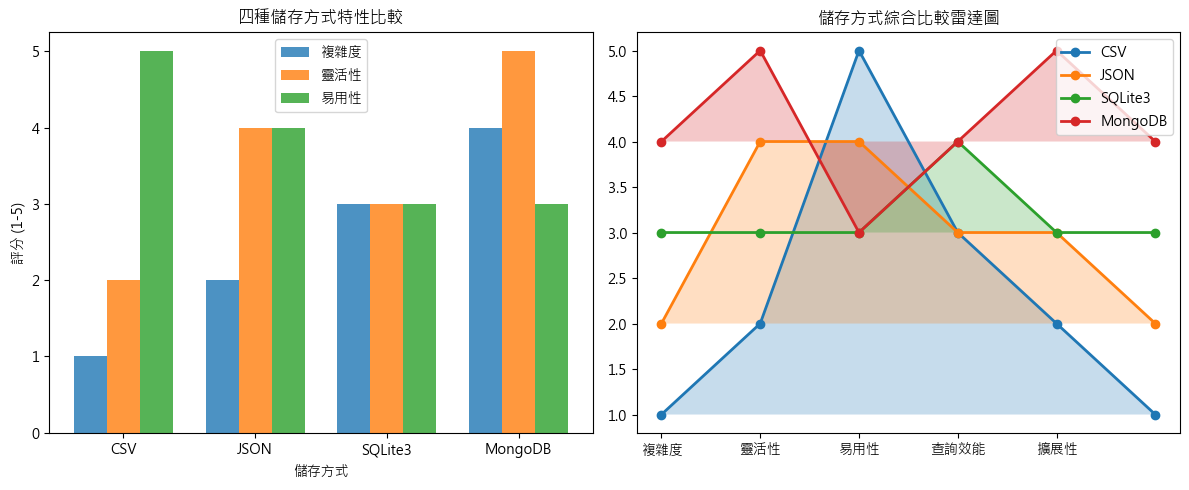


📊 四種儲存方式總結：
1. CSV    - 簡單表格，適合匯入匯出
2. JSON   - 結構化資料，適合API傳輸
3. SQLite3 - 輕量級關聯式資料庫，功能完整
4. MongoDB - NoSQL文件資料庫，擴展性強


In [8]:
# 比較四種儲存方式的特性
storage_types = ['CSV', 'JSON', 'SQLite3', 'MongoDB']
complexity = [1, 2, 3, 4]  # 複雜度評分
flexibility = [2, 4, 3, 5]  # 靈活性評分
ease_of_use = [5, 4, 3, 3]  # 易用性評分

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 長條圖比較
x_pos = range(len(storage_types))
width = 0.25

axes[0].bar([x - width for x in x_pos], complexity, width, label='複雜度', alpha=0.8)
axes[0].bar(x_pos, flexibility, width, label='靈活性', alpha=0.8)
axes[0].bar([x + width for x in x_pos], ease_of_use, width, label='易用性', alpha=0.8)

axes[0].set_xlabel('儲存方式')
axes[0].set_ylabel('評分 (1-5)')
axes[0].set_title('四種儲存方式特性比較')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(storage_types)
axes[0].legend()

# 雷達圖比較
categories = ['複雜度', '靈活性', '易用性', '查詢效能', '擴展性']
csv_stats = [1, 2, 5, 3, 2]
json_stats = [2, 4, 4, 3, 3]
sqlite_stats = [3, 3, 3, 4, 3]
mongo_stats = [4, 5, 3, 4, 5]

# 閉合雷達圖
csv_stats += csv_stats[:1]
json_stats += json_stats[:1]
sqlite_stats += sqlite_stats[:1]
mongo_stats += mongo_stats[:1]
categories += categories[:1]

angles = [n / float(len(categories)-1) * 2 * 3.14159 for n in range(len(categories))]

axes[1].plot(angles, csv_stats, 'o-', linewidth=2, label='CSV')
axes[1].plot(angles, json_stats, 'o-', linewidth=2, label='JSON')
axes[1].plot(angles, sqlite_stats, 'o-', linewidth=2, label='SQLite3')
axes[1].plot(angles, mongo_stats, 'o-', linewidth=2, label='MongoDB')
axes[1].fill(angles, csv_stats, alpha=0.25)
axes[1].fill(angles, json_stats, alpha=0.25)
axes[1].fill(angles, sqlite_stats, alpha=0.25)
axes[1].fill(angles, mongo_stats, alpha=0.25)

axes[1].set_xticks(angles[:-1])
axes[1].set_xticklabels(categories[:-1])
axes[1].set_title('儲存方式綜合比較雷達圖')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

print("\n📊 四種儲存方式總結：")
print("1. CSV    - 簡單表格，適合匯入匯出")
print("2. JSON   - 結構化資料，適合API傳輸")
print("3. SQLite3 - 輕量級關聯式資料庫，功能完整")
print("4. MongoDB - NoSQL文件資料庫，擴展性強")

# CRUD 操作總結

| 操作 | CSV | JSON | SQLite3 | MongoDB |
|------|-----|------|---------|---------|
| Create | ✅ | ✅ | ✅ | ✅ |
| Read | ✅ | ✅ | ✅ | ✅ |
| Update | ⚠️ | ✅ | ✅ | ✅ |
| Delete | ⚠️ | ✅ | ✅ | ✅ |

**說明：**
- CSV 的 Update/Delete 操作較為複雜，通常需要重寫整個檔案
- JSON 適合中小型結構化資料
- SQLite3 提供完整的 SQL 查詢功能
- MongoDB 適合非結構化資料和大量數據